# phân tích trend mua sắm theo từng Vùng (Region). Khám phá đặc trưng mua sắm của các Vùng.

Kiểu vùng nào bán chạy nhất (sắp xếp), vùng nào lợi nhuận/doanh thu/unit cao nhất (sắp xếp ra). Mặt hàng ưa thích tại các vùng và trên toàn quốc...

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dataflow import df_train, df_test, df_geography, df_product
import matplotlib.pyplot as plt

In [3]:
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

In [ ]:
df.info()
df.head()
# COGS: Cost of Goods Sold là vốn chi phí để sản xuất ra sản phẩm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ProductID  901561 non-null  int64         
 1   Date       901561 non-null  datetime64[ns]
 2   Zip        901561 non-null  int64         
 3   Units      901561 non-null  int64         
 4   Revenue    901561 non-null  float64       
 5   COGS       901561 non-null  float64       
 6   City       901561 non-null  object        
 7   State      901561 non-null  object        
 8   Region     901561 non-null  object        
 9   District   901561 non-null  object        
 10  Category   901561 non-null  object        
 11  Segment    901561 non-null  object        
 12  Product    901561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 89.4+ MB


,ProductID,Date,Zip,Units,Revenue,COGS,City,State,Region,District,Category,Segment,Product
0,1228,2013-07-31,78773,12,19648.44,12309.747660,"Austin, TX",TX,Central,District #23,Urban,Convenience,Pirum UC-30
1,781,2014-03-12,90501,16,20351.52,13497.128064,"Torrance, CA",CA,West,District #37,Rural,Productivity,Natura RP-69
2,2090,2013-11-29,44460,26,111367.62,91488.499830,"Salem, OH",OH,East,District #14,Urban,Convenience,Currus UC-25
3,1116,2018-08-29,30122,12,36280.44,21967.806420,"Lithia Springs, GA",GA,East,District #09,Rural,Select,Pirum RS-04
4,993,2013-04-27,75789,14,55557.18,48645.866808,"Troup, TX",TX,Central,District #24,Urban,Convenience,Natura UC-56


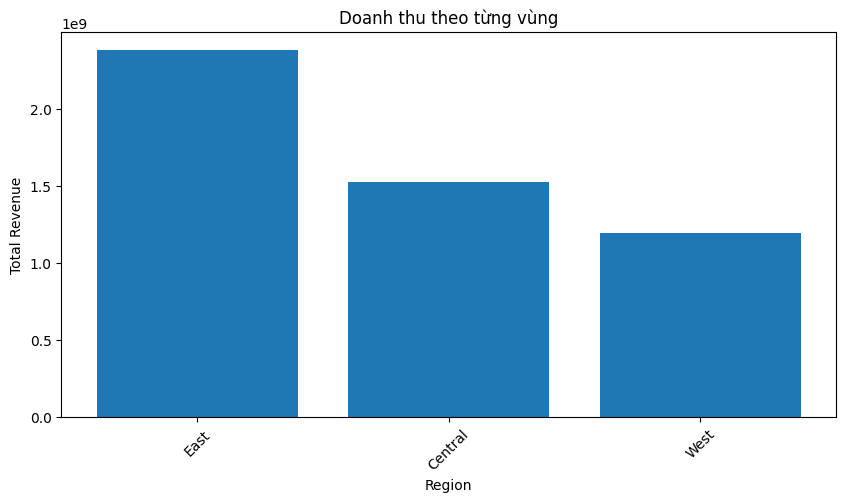

In [14]:
# Tổng hợp doanh thu theo vùng (Region)
region_revenue = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)

# Vẽ biểu đồ doanh thu theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_revenue.index, region_revenue.values)
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.title("Doanh thu theo từng vùng")
plt.xticks(rotation=45)
plt.show()

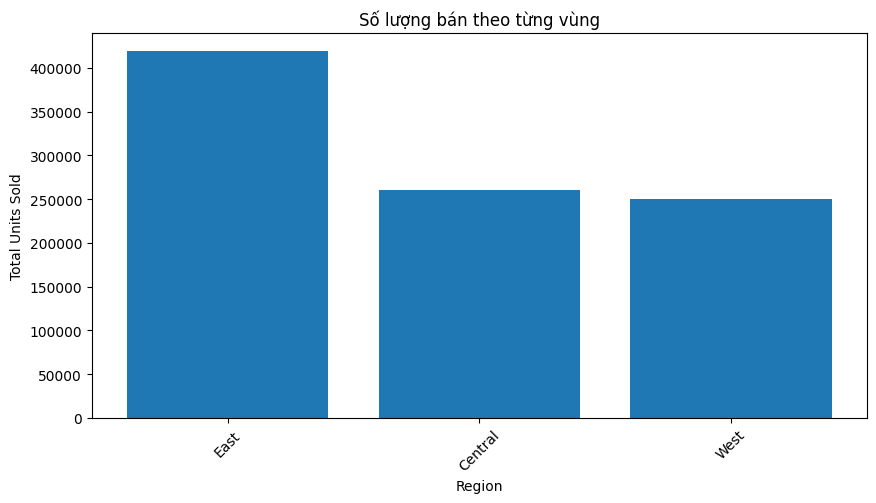

In [12]:
# Tổng hợp số lượng bán theo vùng
region_units = df.groupby("Region")["Units"].sum().sort_values(ascending=False)

# Vẽ biểu đồ số lượng bán theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_units.index, region_units.values)
plt.xlabel("Region")
plt.ylabel("Total Units Sold")
plt.title("Số lượng bán theo từng vùng")
plt.xticks(rotation=45)
plt.show()

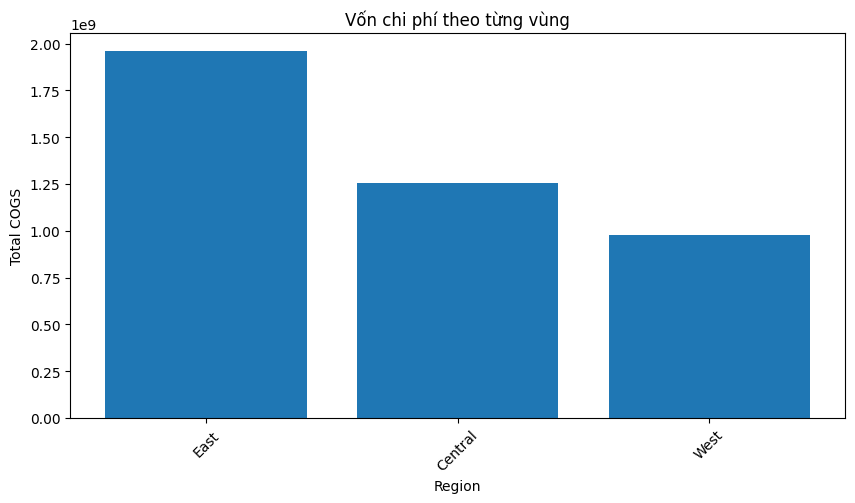

In [15]:
# Tổng hợp vốn chi phí theo vùng
region_cogs = df.groupby("Region")["COGS"].sum().sort_values(ascending=False)

# Vẽ biểu đồ vốn chi phí theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_cogs.index, region_cogs.values)
plt.xlabel("Region")
plt.ylabel("Total COGS")
plt.title("Vốn chi phí theo từng vùng")
plt.xticks(rotation=45)
plt.show()

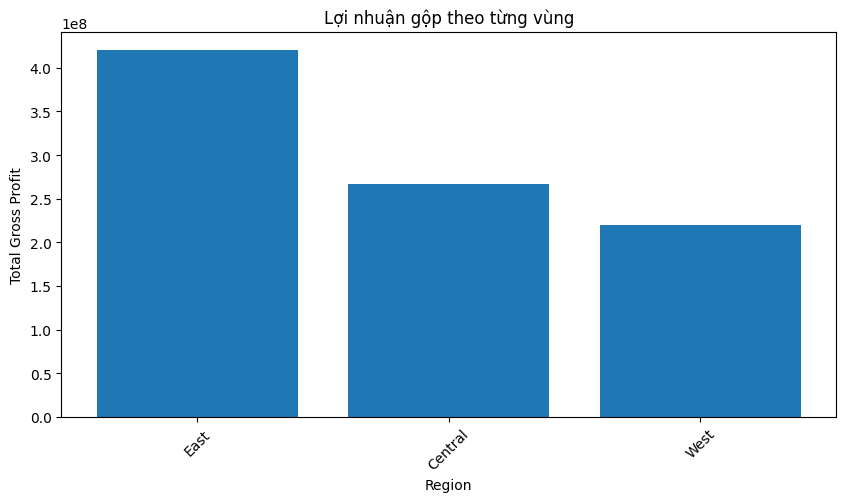

NameError: name 'tools' is not defined

In [ ]:
# Tính toán lợi nhuận gộp (Gross Profit)
df["Gross_Profit"] = df["Revenue"] - df["COGS"]

# Tổng hợp lợi nhuận theo vùng (Region)
region_profit = df.groupby("Region")["Gross_Profit"].sum().sort_values(ascending=False)

# Vẽ biểu đồ lợi nhuận theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_profit.index, region_profit.values)
plt.xlabel("Region")
plt.ylabel("Total Gross Profit")
plt.title("Lợi nhuận gộp theo từng vùng")
plt.xticks(rotation=45)
plt.show()
